## Get and check adjacency metrics

In [2]:
import Pkg
Pkg.activate("..")

using CSV, DataFrames, Graphs, Plots

  Activating project at `~/Desktop/ClusterComputation`


In [3]:
# 1. Positions CSV
positions_df = CSV.read("channel_positions_Magda.csv", DataFrame;
                     types=[String, Float64, Float64])

Row,ch_name,x,y
,String,Float64,Float64
1,Fp1,-0.0309026,0.114585
2,Fp2,0.0284095,0.115346
3,F3,-0.051809,0.0866879
4,F4,0.0502743,0.0874384
5,C3,-0.0671487,0.0233582
6,C4,0.0653289,0.0235731
7,P3,-0.0550382,-0.0442103
8,P4,0.053636,-0.0443345
9,O1,-0.0315736,-0.0805684


In [4]:
coords = Dict(row.ch_name => (row.x, row.y) for row in eachrow(positions_df))

Dict{String, Tuple{Float64, Float64}} with 59 entries:
  "O1"  => (-0.0315736, -0.0805684)
  "CPz" => (-0.00152491, -0.0105184)
  "PO3" => (-0.0386246, -0.0673616)
  "C5"  => (-0.0820853, 0.0192936)
  "PO8" => (0.0535573, -0.0664169)
  "FC1" => (-0.0357159, 0.0617141)
  "F7"  => (-0.0718766, 0.0731035)
  "F4"  => (0.0502743, 0.0874384)
  "CP5" => (-0.0815135, -0.0133457)
  "T8"  => (0.0832614, 0.0152582)
  "AF7" => (-0.0563607, 0.0991515)
  "Fpz" => (-0.00133734, 0.119102)
  "CP1" => (-0.0374251, -0.0108242)
  "FCz" => (-0.00127143, 0.0634598)
  "FC5" => (-0.078906, 0.0513674)
  "P7"  => (-0.074458, -0.0421232)
  "AF3" => (-0.035186, 0.10913)
  "CP3" => (-0.0654722, -0.0118966)
  "TP8" => (0.0836223, -0.0150857)
  ⋮     => ⋮

In [5]:
adj_df = CSV.read("adjacency_Magda.csv", DataFrame; stringtype=String, strict=false)

Row,Column1,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T7,T8,P7,P8,Fz,Cz,Pz,Oz,FC1,FC2,CP1,CP2,FC5,FC6,CP5,CP6,F1,F2,C1,C2,AF3,AF4,FC3,FC4,CP3,CP4,PO3,PO4,F5,F6,C5,C6,P5,P6,AF7,AF8,FT7,FT8,TP7,TP8,PO7,PO8,Fpz,AFz,FCz,CPz,POz
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,Fp1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,Fp2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
3,F3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,F4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,C3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,C4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,P3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,P4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,O1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [6]:
for name in names(adj_df)
    if name != "Column1"  # Skip non-numeric cols if any
        #print(name)
        adj_df[!, name] = Float64.(coalesce.(adj_df[!, name], 0.0))
    end
end

In [7]:
adjacency = Matrix{Float64}(adj_df[:, 2:end])

59×59 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  1.0
 ⋮                        ⋮              ⋱                 ⋮              
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     

In [8]:
ch_names = positions_df.ch_name

59-element Vector{String}:
 "Fp1"
 "Fp2"
 "F3"
 "F4"
 "C3"
 "C4"
 "P3"
 "P4"
 "O1"
 "O2"
 ⋮
 "TP7"
 "TP8"
 "PO7"
 "PO8"
 "Fpz"
 "AFz"
 "FCz"
 "CPz"
 "POz"

In [9]:
# Ensure square
adjacency = adjacency[1:length(ch_names), 1:length(ch_names)]
println("Channels: $(length(ch_names))")
println("Adjacency shape: $(size(adjacency))")

Channels: 59
Adjacency shape: (59, 59)


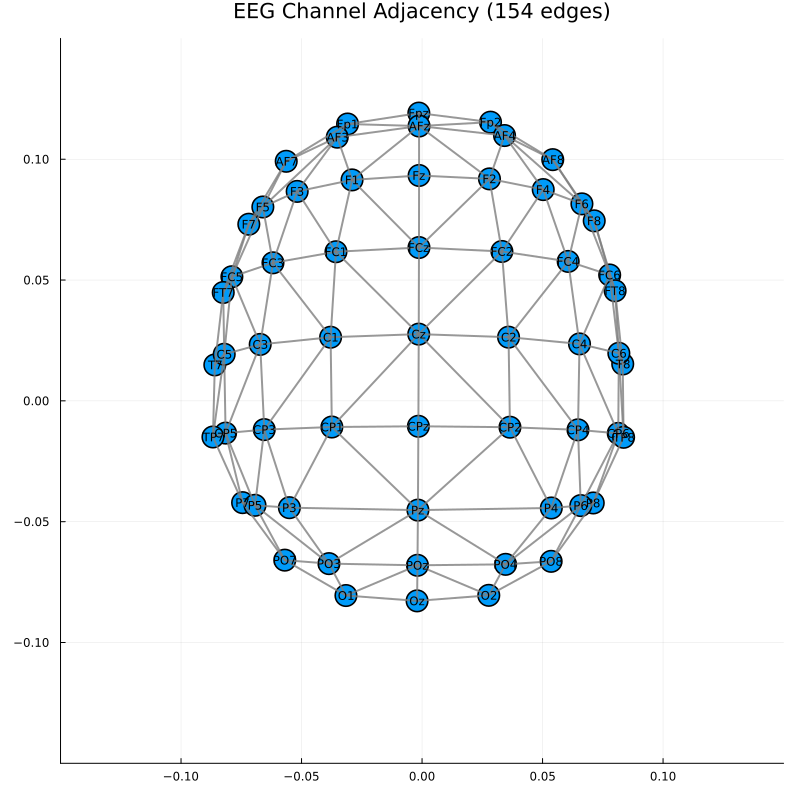

In [10]:
# Plot function
function plot_ch_adjacency(adjacency, ch_names, coords)
    n = size(adjacency, 1)
    g = SimpleGraph(n)
    for i in 1:n, j in i+1:n
        if adjacency[i, j] > 0.5
            add_edge!(g, i, j)
        end
    end

    xs = [get(coords, ch_names[i], (0.0, 0.0))[1] for i in 1:n]
    ys = [get(coords, ch_names[i], (0.0, 0.0))[2] for i in 1:n]

    plt = Plots.scatter(xs, ys; markersize=12, aspect_ratio=:equal, legend=false,
                  xlim=(-0.15, 0.15), ylim=(-0.15, 0.15), size=(800,800))
    for e in edges(g)
        i, j = src(e), dst(e)
        Plots.plot!(plt, [xs[i], xs[j]], [ys[i], ys[j]]; lw=2, color=:gray50, alpha=0.8)
    end
    Plots.annotate!(xs, ys, Plots.text.(ch_names, 8, :black))
    Plots.title!("EEG Channel Adjacency ($(ne(g)) edges)")
    plt
end

p = plot_ch_adjacency(adjacency, ch_names, coords)
display(p)
